# Bayesian Calibration of a SIGMA-GP Poisson process using Gibbs Sampling

M. Keller, I. Seydi, 2025

## SIGMA-GP generative model

Suppose we observe a dataset $D :$
$$
D := \{(x_i, y_i)\}_{1\leq i\leq N}
$$
which follows a time-homogeneous Poisson process over a certain period of time $T$ and a certain 2D domain $\Omega \subset \mathbb R^2,$ with a non-homogeneous spatial intensity given by: $\lambda(x,y)$ such that:
\begin{eqnarray*}
N \vert \lambda &\sim&\mathcal P(\Lambda\times T) \\
\left[D \vert N, \lambda\right] &=& \Lambda^{-N}\prod_{i=1}^N  \lambda\left(x_i, y_i \right)
\end{eqnarray*}
where: $\Lambda = \int_{x,y \in \Omega} \lambda(x, y)dxdy.$ Remember the likelihood is then given by:
$$
\left[D , N \vert \lambda\right] = \frac{\exp\left( - \Lambda \times T\right) \times T^N}{N!} \prod_{i=1}^N  \lambda\left(x_i, y_i \right)
$$

We model $\lambda$ as:
$$
\lambda(x, y) = \bar\lambda\sigma(f(x, y)),
$$
where $\bar\lambda$ is known,
$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$
and $f:\Omega \mapsto\mathbb R$ is an unknwon function we wish to estimate. 
Adopting a Bayesian perspective, we define a Gaussian process prior on $f$ with known mean function $m(x,y)$ and Gaussian covariance function $k((x, y) ; (x',y')):$
$$
f \sim GP\left(m(x,y)\ ;\ k((x, y) ; (x',y')) \right)
$$

Our goal is to sample from the posterior density of $f$ or, more precisely, of $f_T := \{f(x,y)\}_{(x,y) \in T}$ with $T$ an arbitrary finite set of test points : 
\begin{eqnarray*}
\left[ f_T \vert D \right] &\propto& \left[ D \vert f_T \right] \times \left[ f_T\right] \\
 &\propto& \mathcal P\left( N \vert \bar\lambda\int_\Omega \sigma \circ f_T\right) \times GP\left( f_T \vert m(\cdot ), k(\cdot, \cdot)\right). \\
\end{eqnarray*}

Except in special cases, $\int_\Omega \sigma \circ f_T$ is untractable and hence so is the target posterior. This is why, following Donner, Opper, Molkenthin etc. we resort to data augmentation as described hereafter.




## Latent Poisson Process

First, we introduce $\Pi=\{(X_j, Y_j)\}_{1\leq j\leq N_\Pi}$ a latent random variable, defined as the realization of a second time-homogeneous Poisson process aver the same period of time $T$ and 2D domain $\Omega \subset \mathbb R^2,$ with non homogeneous intensity $\check\lambda(x,y)$ such that:
$$
\check\lambda(x,y) := \bar\lambda - \lambda(x,y) = \bar\lambda\left(1- \sigma\left\{ f(x, y)\right\}\right) = \bar\lambda\sigma\left\{ -f(x, y)\right\}.
$$
Notice that the superposition $D \cup \Pi,$ with size $N_{tot} := N+N_\Pi,$ follows a spatially homogeneous Poisson process since:
$$
\lambda(x,y) + \check\lambda(x,y) = \lambda(x,y) + \bar\lambda - \lambda(x,y) = \bar\lambda,
$$
Hence 
$$
N_{tot}:=N+N_\Pi \sim \mathcal P\left( \bar\lambda \times T \times \vert\Omega\vert \right).
$$
Hence $N_{tot}$ is easy to simulate, following the above Poisson law. $\Pi$ is also easy to simulate given $f,$ by thinning: simply draw $N_{tot}$ uniform 2D points $(X_j, Y_j)$ within $\Omega,$ compute $f_j := f(X_j, Y_j)$ then allocate each point $j$ to $\Pi$ with probability:
$$
\mathbb P\left[  (X_j, Y_j) \in \Pi \vert f_j \right] = \frac{\sigma\left\{ -f_j\right\}}{\sigma\left\{ -f_j\right\} + \sigma\left\{ f_j\right\}} = \sigma\left\{ -f_j\right\}.
$$
Once this is done, re-define and re-order the $(X_j, Y_j)$ such that $\{(X_j, Y_j)\}_{1\leq j\leq N} = D$ and $\{(X_j, Y_j)\}_{N\leq j+1\leq N_{tot}} = \Pi$


## Latent Polya-Gamma Process (PGP)

We now introduce a second set of latent variables ${\boldsymbol\omega} = (\omega_j)_{1\leq j\leq N_{tot}},$ such that, *a priori*:
$$
\omega_j \vert N_{tot} \stackrel{iid}{\sim} PG(1, 0)
$$
and re-define arbitrarily the augmented conditional density of $D \cup \Pi $ given $ f, \boldsymbol\omega$:
$$
\left[ D \cup \Pi \vert (f_j)_{j=1, \ldots, N_{tot}}, {\bf\omega} \right] = 
\frac{\exp\left(-\bar\lambda\times T\times \vert\Omega\vert\right)}{N_{tot}!}
%\left(\bar\lambda\times T\times \vert\Omega\vert\right)^{N_{tot}}
\times\prod_{j=1}^N \frac{\bar\lambda}{2}\exp\left(\frac{f_j}{2}-\frac{f_j^2}{2}\omega_j\right) 
\times \prod_{j=N+1}^{N_{tot}}\frac{\bar\lambda}{2} \exp\left(-\frac{f_j}{2}-\frac{f_j^2}{2}\omega_j\right),
$$
then (thanks to elaborate Laplace-transformation wizardry) we can show that, by integrating $\boldsymbol\omega$ we indeed recover:
$$
\left[ D \cup \Pi \vert (f_j)_{j=1, \ldots, N_{tot}}, N \right] = 
\frac{\exp\left(-\bar\lambda\times T\times \vert\Omega\vert\right)}{N_{tot}!}
\prod_{j=1}^N \bar\lambda \sigma(f_j) \times \prod_{j=N+1}^{N_{tot}}\bar\lambda \sigma(-f_j).
$$

### Conditional conjugacy

Plus, the PGP model is conjugate to the SIGMA-GP model, in that the $w_j$'s are *a posteriori* independent conditional on $D\cup \Pi$ and the $f_j$, with:
$$
w_j \vert D \cup \Pi, f_j \stackrel{ind}{\sim} PG(1,\vert f_j\vert).
$$

This property is key to including PGP variables as a block in a Gibbs sampling scheme.



## Summary

The full data-augmented model contains the following variables, oserved or latent:

- $D$: the observed points
- $\Pi$ the latent points
- $\boldsymbol \omega = \boldsymbol \omega_D \cup \boldsymbol \omega_\Pi$ the latent PGP at observed and latent points
- $\boldsymbol f = \boldsymbol f_D \cup \boldsymbol f_\Pi$ the latent GP at observed and latent points

Then the complete augmented likelihood is given by: 
$$
\left[ D, f, \boldsymbol \omega_D, \Pi,, \boldsymbol \omega_\Pi, N_{tot} \vert \bar\lambda \right]
=
\left[ D \vert f, {\boldsymbol\omega} \right] \left[ f \right] \left[{\boldsymbol\omega}_D \right] \left[{\boldsymbol\omega}_\Pi \right] 
$$
$$= 
\frac{\exp\left(-\bar\lambda\times T\times \vert\Omega\vert\right)}{N_{tot}!}
%\left(\bar\lambda\times T\times \vert\Omega\vert\right)^{N_{tot}}
\times\prod_{j=1}^N \frac{\bar\lambda}{2}\exp\left(\frac{f_j}{2}-\frac{f_j^2}{2}\omega_j\right) 
\times \prod_{j=N+1}^{N_{tot}}\frac{\bar\lambda}{2} \exp\left(-\frac{f_j}{2}-\frac{f_j^2}{2}\omega_j\right),
$$
$$
\times GP\left( f \vert m, K \right) \times \prod_{j=1}^{N} PG(\omega_j \vert 1, 0) \times \prod_{j=N+1}^{N_{tot}} PG(\omega_j \vert 1, 0)
$$

## Blocked Gibbs Algorithm

The idea is to divide the above variables into a certain number of blocks, such that the complete conditional density of each block can be simulated exactly. Here are the blocks that we suggest: 

- $\bf f := \boldsymbol f_D \cup \boldsymbol f_\Pi $ the latent GP evaluated at observed and latent points;
- $\Pi$ : the latent Poisson process and the associated latent Polya-Gamma process;
- $\boldsymbol\omega = \boldsymbol \omega_D \cup \boldsymbol \omega_\Pi $ the latent PGP at the observed and latent points

The Gibbs algorithm generates a Markov chain $(\boldsymbol\theta^{(t)})_{t=1,\ldots,T}$ with $\boldsymbol\theta^{(t)}:=\left(\boldsymbol f^{(t)}, \Pi^{(t)},\boldsymbol \omega_\Pi^{(t)} \right),$ given a starting point $\boldsymbol\theta^{(1)},$ ideally simulated from the prior law on $\theta,$ and iterating the following conditional updating steps.

### Remark

By analyzing the details of the updating steps below, it becomes clear that only the initial values $\Pi^{(1)}, \boldsymbol\omega^{(1)}$ need to be generated. We suggest to simulate $N_{tot}^{(1)} \sim \mathcal P(\bar\lambda\ T\ \vert\Omega\vert)\times \boldsymbol 1_{\left\{N_{tot}^{(1)}\geq N\right\}},$ simulate $(X_i^{(1)}, Y_i^{(1)})\stackrel{iid}{\sim}\mathcal U(\Omega)$ for $i=N+1, \ldots, N_{tot}$ then set $\Pi^{(1)}:=\{(X_i^{(1)}, Y_i^{(1)})\}_{i=N+1,\ldots, N_{tot}^{(1)}}.$


We now assume we have generated $\boldsymbol \theta^{(t)}$ for some $t\geq 1,$ and detail step by step how to obtain the updated vector $\boldsymbol \theta^{(t+1)}.$

### Updating the latent GP evaluated at all points

The latent GP prior is conjugate to the PGP model, so that the conditional posterior used to simulate the updated GP $\boldsymbol f^{(t+1)}$ is the multivariate normal:
$$
\boldsymbol f^{(t+1)} \vert D, \Pi^{(t)}, \boldsymbol \omega^{(t)} \sim \mathcal N\left(\left(\boldsymbol \Omega^{(t)} + {\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{(t)}}^{-1}\right)^{-1}\left( {\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{(t)}}^{-1}\boldsymbol m + \boldsymbol u\ \right);\ \left(\boldsymbol \Omega^{(t)} + {\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{(t)}}^{-1}\right)^{-1}\right),
$$
with 
$$
\boldsymbol \Omega^{(t)} = diag\left(\boldsymbol\omega^{(t)}\right),
$$ 
$$
\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{(t)}= \left( k((X_i^{(t)}, Y_i^{(t)}), (X_j^{(t)}, Y_j^{(t)})^{(t)}) \right)_{\substack{i=1:N_{tot}^{(t)}\\ j=1:N_{tot}^{(t)}}}
$$
$$
\boldsymbol X^{(t)}, \boldsymbol Y^{(t)} = D \cup \Pi^{(t)}
$$
and $\boldsymbol u^{(t)} := (u_1^{(t)}, \ldots, u^{(t)}_{N_{tot}^{(t)}}),$ $u_i^{(t)} = \frac{1}{2}$ if $i \leq N$ and $u_i^{(t)} = -\frac{1}{2}$ if $i > N.$ 



### Updating the latent PP

Here we introduce the following *auxiliary* latent variables:
- $\Pi^\ast = ((X_i^\ast, Y_i^\ast))_{1\leq i\leq N^\ast})$  the realization of a spatially and temporally homogeneous Poisson process over the spatial $\Omega$ and period of time $T$, with intensity $\bar\lambda.$ This means that:
$$
N^\ast \sim \mathcal P(\bar\lambda T \vert \Omega\vert)
$$
$$
X_i, Y_i \vert N^\ast \stackrel{iid}{\sim} \mathcal U(\Omega),\quad i=1,\ldots, N^\ast
$$
- $\boldsymbol f^\ast = (f(X_i^\ast, Y_i^\ast))_{1\leq i\leq N^\ast}$ the GP evaluated at the auxiliary set of points. Again, the full conditional density of this block (given all the other blocks) is multivariate normal, following the well-known formulae:
$$
\boldsymbol f^\ast  \vert \boldsymbol f^{(t+1)}, \Pi^{(t)}, \Pi^\ast, D \sim \mathcal N\left(
\boldsymbol m^\ast + \boldsymbol K^{(t)}_{\boldsymbol f^\ast,\boldsymbol f} {\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{(t)}}^{-1} (\boldsymbol f^{(t+1)} - \boldsymbol m{(t)})\ ;\ \boldsymbol K_{\boldsymbol f^\ast,\boldsymbol f^\ast} - \boldsymbol K_{\boldsymbol f^\ast,\boldsymbol f}^{(t)} {\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{(t)}}^{-1}  \boldsymbol K_{\boldsymbol f,\boldsymbol f^\ast}^{(t)} \right),
$$
with
$$
\boldsymbol K_{\boldsymbol f^\ast, \boldsymbol f}^{(t)} = \left({\boldsymbol K_{\boldsymbol f, \boldsymbol f^\ast}^{(t)}}\right)^\top = \left( k((X_i^\ast, Y_i^\ast), (X_j^{(t)}, Y_j^{(t)})^{(t)}) \right)_{\substack{i=1:N^\ast\\ j=1:N_{tot}^{(t)}}}.
$$

$\Pi^{(t+1)}$ is then recovered based on $\Pi^\ast$ and $\boldsymbol f^\ast$ through a *thinning* argument, meaning that each point $(X_i^\ast, Y_i^\ast)$ for $i=1,\ldots, N^\ast$ is allocated to $\Pi^{(t+1)}$ with probability: $\sigma (-f_i^\ast),$ where $f_i^\ast:=f(X_i^\ast, Y_i^\ast).$

To summarize, the conditional density $\Pi^{(t+1)} \vert D, \boldsymbol f^{(t+1)},$ obtained as a marginal of the joint posterior conditional 
$$
\left[\Pi^{(t+1)}, \boldsymbol f^\ast, \Pi^\ast \vert D, \boldsymbol f^{(t+1)}, \boldsymbol \Pi^{(t)} \right] = 
\left[\Pi^{(t+1)} \vert \boldsymbol f^\ast, \Pi^\ast  \right] \times
\left[\boldsymbol f^\ast  \vert \Pi^\ast,  \boldsymbol f^{(t+1)}, \Pi^{(t)} \right] \times
\left[\Pi^\ast \right]
$$ 

where the first conditional density  easily simulated by thinning, using the following steps:
1. Sample the total number of points of the latent homogeneous Poisson process: $N^\ast \vert D \sim \mathcal P \left(  \bar\lambda \times T \times \vert \Omega \vert \right).$
2. For $i=1, \ldots, N^\ast$: simulate $(X_i^\ast, Y_i^\ast)$ uniformly over $\Omega,$ yielding $\Pi^\ast$
3. Simulate $\boldsymbol f^\ast$ using the above conditional density $\boldsymbol f^\ast  \vert \boldsymbol f^{(t+1)},  \Pi^\ast, \Pi^{(t)}$
4. For $i=1, \ldots, N^\ast$: allocate point $(X_i^\ast, Y_i^\ast)$ to $\Pi^{(t+1)}$ with probability: $1-\sigma (f_i^\ast) = \sigma (-f_i^\ast)$;
6. Modify accordingly: $N_{tot}^{(t+1)} := N + \vert\Pi^{(t+1)}\vert$ and $\boldsymbol f_\Pi^{(t+1)}$ in $\boldsymbol f^{(t+1)} = \boldsymbol f_D^{(t+1)}\cup\boldsymbol f_\Pi^{(t+1)},$ from its current value $(f^{(t+1)}(X_i^{(t)}, Y_i^{(t)}))_{i=1,\ldots,N_{tot}^{(t)}}$ to its new value $(f_i^\ast)_{i=1,\ldots,N_{tot}^{(t+1)}}.$


 

### Updating the PGP at all points (observed & latent)

The posterior conditional density of $w_i^{(t+1)}$ for $i=1, \ldots, N_{tot}$ is given by:
$$
\omega_i^{(t+1)} \vert f_i^{(t+1)} \stackrel{ind}{\sim} PG(1, \vert f_i^{(t+1)}\vert).
$$

## Implementation details

### Dimension of the MCMC chain

We note $\boldsymbol\theta^{(t)}:=\left(\boldsymbol f^{(t)}, \boldsymbol \omega^{(t)}, \Pi^{(t)}, N_{tot}^{(t)} \right)_{1\leq t\leq T}$ the MCMC chain generated by the Gibbs sampler. Note that, at each step $t$, the chain has dimension: $d^{(t)} = 4 N_{tot}^{(t)} - 2N  + 1.$

However, using Open TURNS, the dimension of the MCMC chain must be fixed in advance. Therefore, we need to choose a reasonable upper bound for $N_{tot}^{(t)},$ let's call it $N_\max.$ Remember that in principle $N_{tot}$'s law is close to the Poisson $\mathcal P\left( \bar\lambda \times T \times \vert \Omega \vert \right),$ hence we suggest using the $99.9$-th percentile of this law.

Open TURNS also requires the Gibbs blocks to be allocated statically, meaning that the blocks do not change from one iteration to the other. To do this, we must pre-allocate components of the parameter vector $\boldsymbol\theta$ to each block. We chose the following allocation policy:
\begin{eqnarray*}
\boldsymbol\theta_{1:N_{\max}} &:=& \boldsymbol f \\
\boldsymbol\theta_{N_{\max}+1:2N_{\max}} &:=& \boldsymbol \omega \\
\boldsymbol\theta_{2N_\max+1:4N_\max-2N} &:=& \Pi \\
\theta_{4N_\max - 2N+1} &:=&  N_{tot}
\end{eqnarray*}

This relies on the assumption that, for all $t=1,\ldots, T$ we have: $N_{tot}^{(t)} \leq N_\max,$ so that the last $N_\max - N_{tot}^{(t)}$ components of the latent variables $\Pi$, $\boldsymbol f_\Pi$ and $\boldsymbol \omega_\Pi$ may take arbitrary values. On the other hand, if per chance $N_{tot}^{(t)} > N_\max,$ the latent processes are truncated, which may induce some residual bias on the final estimation, showing that some care must be taken when calibrating $N_\max.$


### Efficient conditional Normal simulation

$$
\boldsymbol f \vert D, \Pi, \boldsymbol \omega \sim \mathcal N\left(\left(\boldsymbol \Omega + \boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1}\right)^{-1}\left( \boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1} \boldsymbol m + \boldsymbol u\ \right)\ ;\ \left(\boldsymbol \Omega + \boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1}\right)^{-1}\right),
$$
with $\boldsymbol \Omega = diag\left(\boldsymbol\omega\right),$ and $\boldsymbol u := (u_1, \ldots, u_{N_{tot}}),$ $u_i = \frac{1}{2}$ if $i \leq N$ and $u_i = -\frac{1}{2}$ if $i > N.$

Let $LL^\top = \boldsymbol K_{\boldsymbol f, \boldsymbol f}$ be $\boldsymbol K_{\boldsymbol f, \boldsymbol f}$'s Cholesky decomposition, so that: ${L^{-1}}^\top L^{-1} = \boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1}$

Then, owing to Woodbury's formula:
$$
\left(\boldsymbol \Omega + \boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1}\right)^{-1} = 
\left(\boldsymbol \Omega + {L^{-1}}^\top L^{-1}\right)^{-1} = 
\boldsymbol\Omega^{-1} - \boldsymbol\Omega^{-1} 
\left( 
\boldsymbol I_{N_{tot}} + L^{-1}\boldsymbol\Omega^{-1}{L^{-1}}^\top
\right)^{-1}
\boldsymbol\Omega^{-1}
$$

Remember that, to simulate $X \sim \mathcal N(\mu, \Sigma),$ with $\mu \in \mathbb R^d,$ $\Sigma \in \mathbb R^{d}\times\mathbb R^{d}$ def. pos., a numerically sensible strategy is to notice that:
$$
Z := \Sigma^{-1/2}(X - \mu) \sim \mathcal N(0, I_d),
$$
and that $\Sigma^{-1/2} = L,$ with $L$ the Cholesky decomposition of $\Sigma^{-1}$ such that: $\Sigma^{-1}=LL^\top.$ Hence $X$ can be simulated as:
$$
X := L^{-1}Z + \mu
$$
In the current case this implies $LL^\top = \Sigma^{-1} = \boldsymbol \Omega + \boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1}.$ Besides we also have:
$$
\mu = \Sigma\left(\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1} \boldsymbol m + \boldsymbol u\right)
= (L^{-1})^\top L^{-1}\left(\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1} \boldsymbol m + \boldsymbol u\right)
$$
So that finally:
$$
X := L^{-1}Z + (L^{-1})^\top L^{-1}\left(\boldsymbol K_{\boldsymbol f, \boldsymbol f}^{-1} \boldsymbol m + \boldsymbol u\right)
$$

In [15]:
##########################
#    Necessary imports   #
##########################

from SIGMA_GP_PP_Gibbs  import *

f_init = time.time()

#ot.RandomGenerator.SetSeed(0) # Make results reproducible by freezing Open TURNS's random generator's seed
#np.random.seed(0) # Make results reproducible by freezing Numpy's random generator's seed


In [16]:


####################
# Generative model #
####################

# Assuming square domain [0,1]*[0,1] (surface 1)
# and null trend

lambdaBar = 10
T = 40

sigmoid = ot.SymbolicFunction(['z'], ['1/(1+exp(-z))'])

def trend(X):
    return [0]

# GP model specification
covarianceModel = ot.SquaredExponential([2.5, 1.5], [20.0])
m = ot.PythonFunction(2, 1, trend)

# Homogeneous augmented Poisson process Size
Poisson = ot.Poisson(lambdaBar * T)

# Upper bound on size of augmented Poisson process
Nmax = int(Poisson.computeQuantile(1)[0])


In [17]:

###################
# Data generation #
###################

# Simulate according to homogogeneous Poisson process
N_star = int(Poisson.getRealization()[0])
myUniform = ot.ComposedDistribution([ot.Uniform(0, 1)]*2)
XY_star = myUniform.getSample(N_star)
mesh = ot.Mesh(XY_star)

# apply trend function to mesh and create Gaussian process
mTrend = ot.TrendTransform(m, mesh)
Ftot = ot.GaussianProcess(mTrend, covarianceModel, mesh)

# Sigma GP process
field_function = ot.PythonFieldFunction(mesh, 1, mesh, 1, sigmoid)
process = ot.CompositeProcess(field_function, Ftot) 

field_f = process.getRealization()

# Use thinning
p_accept = np.array( field_f.getValues() )
accepted = np.array( ot.Uniform(0, 1).getSample(N_star) ) <= p_accept 
accepted = accepted.ravel()
N = accepted.sum()
Ntot = len(accepted)
NPi = Ntot - N

# Assemble Augmented (Obs + Latent) Poisson process
# /!\ Zero-padded to reach Nmax length
D = np.array( XY_star )[accepted]
Pi = np.array( XY_star )[accepted==False]
Nmax += N

Dtot = np.vstack((D,Pi,[[0,0]]*(Nmax-Ntot)))

# Assemble Augmented (Obs + Latent) Gaussian process
# /!\ Zero-padded to reach Nmax length
fD = np.array(field_f)[accepted]
fPi = np.array(field_f)[accepted==False]
ftot = np.vstack((fD,fPi,[[0]]*(Nmax-Ntot)))


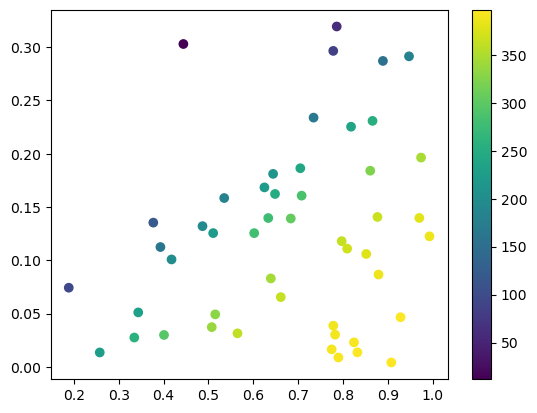

In [18]:
# Plot the data
fig = plt.figure()
plt.scatter( D[:,0], D[:,1], c=p_accept[accepted] *lambdaBar*T )
plt.colorbar()
plt.show()
plt.savefig("Data.png")
plt.close()

In [19]:
###################
# MCMC parameters # 
###################

sampleSize=100#0
blockSize=10#0 # Display convergence messages after every block of iterations with size: blockSize
ninits = 3 # Number of chains run for Gelman-Rubin convergence diagnostic

##################################
# Latent Gaussian process update # 
##################################

f_indices = [i for i in range(Nmax)]
RV_f = ot.RandomVector(NormalCholesky(mu=np.zeros(Nmax), Chol=np.diag([1]*N+[0]*(Nmax-N)), Ntot=Ntot))
ot_link_function_f = ot.PythonFunction(int(4*Nmax-2*N+1), int(Nmax*(Nmax+1)+1), lambda k:py_link_function_f(k,Nmax=Nmax, D=D, m=m, covarianceModel=covarianceModel))

##############################################
# Latent Poisson and Gaussian process update # 
##############################################

Pi_indices = [i for i in range(N,Nmax)]+[i for i in range(2*Nmax,4*Nmax-2*N+1)]
PyRV_Pi = PoissonGaussianProcess(ftot=ftot, Pi=Dtot[N:], Ntot=Ntot, D=D, m=m, covarianceModel=covarianceModel, Poisson=Poisson, myUniform=myUniform )
RV_Pi = ot.RandomVector(PyRV_Pi)
ot_link_function_Pi = ot.PythonFunction(int(4*Nmax-2*N+1), int(3*Nmax-2*N+1), lambda k:py_link_function_Pi(k,Nmax=Nmax,N=N))

#############################
# Latent Polya-Gamma update # 
#############################

w_indices = [i for i in range(Nmax,2*Nmax)]
RV_w = ot.RandomVector(PolyaGammaProcess(ftot=np.concatenate([np.array(field_f).ravel(), np.zeros(Nmax-Ntot)]), Ntot=Ntot))
ot_link_function_w = ot.PythonFunction(4*Nmax-2*N+1, Nmax+1, lambda k:py_link_function_w(k,Nmax=Nmax))

In [20]:
# TEST latent GP update
RV_f.getRealization()
# TEST latent Poisson + GP update
PyRV_Pi.getRealization()
# TEST latent Polya-Gamma
RV_w.getRealization()

    

WRN - Warning! For coherency we set scale upper bounds = [1.99231,1.99041]


class=Point name=Unnamed dimension=619 values=[0.422723,0.139047,0.541905,0.221917,0.128121,0.513608,0.326221,0.127813,0.0449069,0.37064,0.389572,0.267798,0.200222,0.288629,0.761016,0.0570735,0.516411,0.150402,0.0285552,0.0269068,0.210737,1.0405,0.476793,0.105776,0.145142,0.0733756,0.134907,0.0580351,0.209555,0.238377,0.516911,0.148337,0.159889,0.0807,0.345332,0.436014,0.0363459,0.0871425,0.201848,0.0830577,0.149022,0.14136,0.179738,0.169793,0.161782,0.0863504,0.211961,0.338486,0.193739,0.145367,0.149038,0.0987562,0.0489885,0.0665441,0.193571,0.220045,0.275277,0.311054,0.477051,0.483402,0.747876,0.0613102,0.448248,0.14728,0.258106,0.18506,0.795832,0.181,0.487824,0.609607,0.37267,0.117221,0.27198,0.474371,0.562498,0.112473,0.279911,0.1663,0.199286,0.43645,0.0689827,0.0653905,0.0964828,0.831343,0.0678253,0.152991,0.917181,0.0668553,0.137985,0.529866,0.53525,0.0920518,0.128868,0.312534,0.326031,0.0903117,0.0719061,0.590621,0.569262,0.426752,0.161792,0.0612322,0.0970462,0.293626,0.0623307,0.129296,0.155317,0.208208,0.132643,0.195504,0.250684,0.313113,0.402819,0.29516,0.18251,0.205476,0.338018,0.285841,0.0778786,0.130047,0.317345,0.0257968,0.0481409,0.180019,0.116969,0.224311,0.103566,0.10599,0.0440363,0.139033,0.075303,0.122206,0.196022,0.621825,0.111546,0.047084,0.0339221,0.078398,0.276953,0.139638,0.100155,0.28308,0.0219747,0.0246618,0.440186,0.180927,0.33066,0.728707,0.907155,0.0742117,0.0331852,0.132449,0.0940894,0.149454,0.539272,0.488628,0.62474,0.562004,0.426472,0.227991,0.522907,0.642997,0.098768,0.363861,0.235239,0.399426,0.189812,0.22234,0.0762724,0.231237,0.508663,0.16737,0.0581901,0.624813,0.0662791,0.527517,0.19055,0.115832,0.155025,0.446598,0.362808,0.232279,0.212137,0.359708,0.139709,0.0985734,0.101633,0.198019,0.183627,0.305605,0.05432,0.0825858,0.213766,0.365438,0.132616,0.234371,0.0933421,0.0708442,0.119888,0.0723804,0.11772,1.73303,0.0497584,0.110787,0.247519,0.502208,0.0482751,0.213928,0.21809,0.405135,0.406556,0.465904,0.30838,0.0806616,0.161461,0.218296,0.0641363,0.0653568,0.0953121,0.201935,0.426471,0.086264,0.0951514,0.174433,0.207616,0.300975,0.358144,0.135926,0.114901,0.0729242,0.110107,0.0902838,0.210939,0.280164,0.198952,0.206936,0.1207,0.182593,0.319514,0.113854,0.275205,0.226537,0.692634,0.120302,0.341651,0.276622,0.349031,0.305584,0.0864258,0.950529,0.164856,0.113606,0.415708,0.62911,0.616573,0.219925,0.0443105,0.191104,0.910424,0.174073,0.894191,0.0541582,0.0848115,0.112748,0.0315646,0.262349,0.0893243,0.142862,0.134298,0.189685,0.389451,0.147803,0.137263,0.0259434,0.091679,0.261753,0.242267,0.403048,0.047374,0.405452,0.0627014,0.136681,0.407105,0.145377,0.046398,0.753568,0.176924,0.457917,0.142052,1.12177,0.26489,0.416244,0.18288,0.245183,0.66781,0.14939,0.752876,0.0655588,0.879791,0.114403,0.471546,0.0462424,0.636743,0.202491,0.463693,0.227826,0.657881,0.531298,0.951745,0.0758646,0.147509,0.399947,0.202644,0.0753373,0.0420131,0.0372785,0.149765,0.0598054,0.40209,0.219332,0.240616,0.216939,0.253833,0.0467745,0.177238,0.3258,0.0290488,0.0929352,0.186423,0.264969,0.502706,0.0885727,0.0499534,0.152838,0.0778468,0.0693214,0.32774,0.434684,0.482354,0.189473,0.123357,0.267665,0.142194,0.100941,0.0654157,0.0697024,0.123299,0.0894731,0.416365,0.443367,0.205875,0.131878,0.34088,0.273934,0.0819014,0.113995,0.565732,0.108448,0.222944,0.139443,0.100169,0.356316,0.052358,0.21852,0.104027,0.676812,0.101412,0.44565,0.571863,0.131859,0.121349,0.123872,0.227079,0.171064,0.268005,0.111809,0.138479,0.0211927,0.258431,0.267902,0.16824,0.395143,0.41217,0.167972,0.146627,0.133047,0.645089,0.709852,0.138336,0.0276945,0.0839187,0.291564,0.7004,0.0888376,0.173786,0.27775,0.808732,0.0719697,0.127203,0.286982,0.040941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
###############
# Launch MCMC #
###############

samples = []
randinits = []

for i in range(ninits):
    # break
    # Random initialization
    randinit = [0]*(4*Nmax-2*N+1)
    Ntot_init = 0
    while Ntot_init < N:
        Ntot_init = int(ot.Poisson(lambdaBar * T).getRealization()[0])
    randinit[-1] = Ntot_init
    NPi_init = int(Ntot_init - N)
    Pi_init = np.array(myUniform.getSample(NPi_init)).ravel()
    randinit[2*Nmax:2*Nmax+2*NPi_init] = Pi_init 
    randinit[Nmax:Nmax+Ntot_init] = random_polyagamma(size=Ntot_init)
    randinits.append(randinit)
    # Assemble Gibbs sampler
    print("random init %s out of %s: %s"%(str(i+1),str(ninits),str(randinits[i])))
    f_sampler = ot.RandomVectorMetropolisHastings( RV_f, randinits[i], f_indices, ot_link_function_f )
    Pi_sampler = ot.RandomVectorMetropolisHastings( RV_Pi, randinits[i], Pi_indices, ot_link_function_Pi ) 
    w_sampler = ot.RandomVectorMetropolisHastings( RV_w, randinits[i], w_indices, ot_link_function_w )
    Gibbs_sampler = ot.Gibbs([f_sampler, Pi_sampler, w_sampler])
    t1=time.time()
    sample = np.zeros((0,4*Nmax-2*N+1))
    # Main loop
    for j in range((sampleSize)// blockSize):
        newsample = Gibbs_sampler.getSample(blockSize)
        sample = np.vstack((sample, np.array(newsample)))
        t2=time.time()
        print("%s iterations performed in %s seconds"%( (j+1)*blockSize, np.round(t2-t1)))   
        rate = (sample[1:] != sample[:-1]).mean(axis=0) 
        print("componentwise acceptance rate so far: %s"%rate)        
        print("Current state: %s"%sample[-1])
    t2=time.time()
    print("Whole MCMC run took %s seconds"%(t2-t1))    
    samples.append( sample )



random init 1 out of 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

WRN - Warning! For coherency we set scale upper bounds = [1.98662,1.99705]
WRN - Warning! For coherency we set scale upper bounds = [1.9906,1.98642]
WRN - Warning! For coherency we set scale upper bounds = [1.98885,1.97569]
WRN - Warning! For coherency we set scale upper bounds = [1.99219,1.99217]
WRN - Warning! For coherency we set scale upper bounds = [1.98045,1.98039]
WRN - Warning! For coherency we set scale upper bounds = [1.99506,1.97778]
WRN - Warning! For coherency we set scale upper bounds = [1.98269,1.99724]
WRN - Warning! For coherency we set scale upper bounds = [1.99317,1.99442]
WRN - Warning! For coherency we set scale upper bounds = [1.99714,1.99417]
WRN - Warning! For coherency we set scale upper bounds = [1.98588,1.9948]


10 iterations performed in 2.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.1498766   -0.82569874  -1.19142138 ...   0.           0.
 433.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99113,1.98974]
WRN - Warning! For coherency we set scale upper bounds = [1.99755,1.99266]
WRN - Warning! For coherency we set scale upper bounds = [1.99325,1.99292]
WRN - Warning! For coherency we set scale upper bounds = [1.99336,1.99639]
WRN - Warning! For coherency we set scale upper bounds = [1.98647,1.99303]
WRN - Warning! For coherency we set scale upper bounds = [1.9994,1.99507]
WRN - Warning! For coherency we set scale upper bounds = [1.99644,1.98997]
WRN - Warning! For coherency we set scale upper bounds = [1.99276,1.98611]
WRN - Warning! For coherency we set scale upper bounds = [1.98592,1.99254]
WRN - Warning! For coherency we set scale upper bounds = [1.99359,1.98478]


20 iterations performed in 3.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.59437876  -0.91904358  -1.23905196 ...   0.           0.
 421.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99467,1.99501]
WRN - Warning! For coherency we set scale upper bounds = [1.993,1.99272]
WRN - Warning! For coherency we set scale upper bounds = [1.99175,1.98692]
WRN - Warning! For coherency we set scale upper bounds = [1.9857,1.99121]
WRN - Warning! For coherency we set scale upper bounds = [1.98708,1.99089]
WRN - Warning! For coherency we set scale upper bounds = [1.98684,1.98898]
WRN - Warning! For coherency we set scale upper bounds = [1.99202,1.99777]
WRN - Warning! For coherency we set scale upper bounds = [1.99233,1.98485]
WRN - Warning! For coherency we set scale upper bounds = [1.98903,1.98463]
WRN - Warning! For coherency we set scale upper bounds = [1.99491,1.9851]


30 iterations performed in 5.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.26178913  -0.48778771  -0.86139534 ...   0.           0.
 424.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99516,1.99345]
WRN - Warning! For coherency we set scale upper bounds = [1.99449,1.99511]
WRN - Warning! For coherency we set scale upper bounds = [1.99197,1.99686]
WRN - Warning! For coherency we set scale upper bounds = [1.9813,1.99541]
WRN - Warning! For coherency we set scale upper bounds = [1.9933,1.99337]
WRN - Warning! For coherency we set scale upper bounds = [1.98633,1.99468]
WRN - Warning! For coherency we set scale upper bounds = [1.97392,1.97014]
WRN - Warning! For coherency we set scale upper bounds = [1.98188,1.99617]
WRN - Warning! For coherency we set scale upper bounds = [1.99135,1.99438]
WRN - Warning! For coherency we set scale upper bounds = [1.97936,1.98873]


40 iterations performed in 6.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.9463466   -0.73126748  -1.09060772 ...   0.           0.
 445.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.96386,1.95161]
WRN - Warning! For coherency we set scale upper bounds = [1.99669,1.99088]
WRN - Warning! For coherency we set scale upper bounds = [1.98873,1.9903]
WRN - Warning! For coherency we set scale upper bounds = [1.99478,1.98809]
WRN - Warning! For coherency we set scale upper bounds = [1.99112,1.99901]
WRN - Warning! For coherency we set scale upper bounds = [1.99419,1.9818]
WRN - Warning! For coherency we set scale upper bounds = [1.9973,1.98554]
WRN - Warning! For coherency we set scale upper bounds = [1.98594,1.98942]
WRN - Warning! For coherency we set scale upper bounds = [1.99173,1.99102]
WRN - Warning! For coherency we set scale upper bounds = [1.99819,1.99084]


50 iterations performed in 8.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.96187586  -0.50244231  -0.8720325  ...   0.           0.
 437.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98686,1.99518]
WRN - Warning! For coherency we set scale upper bounds = [1.98754,1.99343]
WRN - Warning! For coherency we set scale upper bounds = [1.9922,1.98069]
WRN - Warning! For coherency we set scale upper bounds = [1.98785,1.98056]
WRN - Warning! For coherency we set scale upper bounds = [1.98937,1.99335]
WRN - Warning! For coherency we set scale upper bounds = [1.982,1.99611]
WRN - Warning! For coherency we set scale upper bounds = [1.98883,1.99797]
WRN - Warning! For coherency we set scale upper bounds = [1.9971,1.99026]
WRN - Warning! For coherency we set scale upper bounds = [1.99295,1.98984]
WRN - Warning! For coherency we set scale upper bounds = [1.98506,1.98978]


60 iterations performed in 10.0 seconds
componentwise acceptance rate so far: [1.         1.         1.         ... 0.         0.         0.98305085]
Current state: [  0.49149396  -0.53269962  -0.87980604 ...   0.           0.
 431.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98426,1.98892]
WRN - Warning! For coherency we set scale upper bounds = [1.99356,1.99519]
WRN - Warning! For coherency we set scale upper bounds = [1.99668,1.99826]
WRN - Warning! For coherency we set scale upper bounds = [1.99275,1.99149]
WRN - Warning! For coherency we set scale upper bounds = [1.9819,1.98595]
WRN - Warning! For coherency we set scale upper bounds = [1.98411,1.99387]
WRN - Warning! For coherency we set scale upper bounds = [1.98787,1.97865]
WRN - Warning! For coherency we set scale upper bounds = [1.99646,1.99089]
WRN - Warning! For coherency we set scale upper bounds = [1.9812,1.99145]
WRN - Warning! For coherency we set scale upper bounds = [1.98051,1.99748]


70 iterations performed in 11.0 seconds
componentwise acceptance rate so far: [1.         1.         1.         ... 0.         0.         0.98550725]
Current state: [ 8.88270851e-01 -3.36323899e-01 -6.91240539e-01 ...  0.00000000e+00
  0.00000000e+00  4.54000000e+02]


WRN - Warning! For coherency we set scale upper bounds = [1.99913,1.99373]
WRN - Warning! For coherency we set scale upper bounds = [1.98941,1.99193]
WRN - Warning! For coherency we set scale upper bounds = [1.98967,1.98636]
WRN - Warning! For coherency we set scale upper bounds = [1.99654,1.99745]
WRN - Warning! For coherency we set scale upper bounds = [1.99401,1.98837]
WRN - Warning! For coherency we set scale upper bounds = [1.99575,1.99095]
WRN - Warning! For coherency we set scale upper bounds = [1.99201,1.98605]
WRN - Warning! For coherency we set scale upper bounds = [1.99656,1.9925]
WRN - Warning! For coherency we set scale upper bounds = [1.97848,1.99657]
WRN - Warning! For coherency we set scale upper bounds = [1.99892,1.96936]


80 iterations performed in 13.0 seconds
componentwise acceptance rate so far: [1.         1.         1.         ... 0.         0.         0.98734177]
Current state: [  1.13177343  -0.5727881   -1.02778582 ...   0.           0.
 390.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98794,1.9825]
WRN - Warning! For coherency we set scale upper bounds = [1.99522,1.99929]
WRN - Warning! For coherency we set scale upper bounds = [1.99395,1.99133]
WRN - Warning! For coherency we set scale upper bounds = [1.99344,1.99709]
WRN - Warning! For coherency we set scale upper bounds = [1.99943,1.99723]
WRN - Warning! For coherency we set scale upper bounds = [1.98434,1.99552]
WRN - Warning! For coherency we set scale upper bounds = [1.99549,1.99641]
WRN - Warning! For coherency we set scale upper bounds = [1.99483,1.99422]
WRN - Warning! For coherency we set scale upper bounds = [1.99602,1.99089]
WRN - Warning! For coherency we set scale upper bounds = [1.98644,1.98854]


90 iterations performed in 14.0 seconds
componentwise acceptance rate so far: [1.         1.         1.         ... 0.         0.         0.98876404]
Current state: [ 1.15078148e+00 -2.03752986e-01 -5.51994082e-01 ...  0.00000000e+00
  0.00000000e+00  4.45000000e+02]


WRN - Warning! For coherency we set scale upper bounds = [1.99458,1.9877]
WRN - Warning! For coherency we set scale upper bounds = [1.99553,1.99366]
WRN - Warning! For coherency we set scale upper bounds = [1.97709,1.99024]
WRN - Warning! For coherency we set scale upper bounds = [1.99539,1.99088]
WRN - Warning! For coherency we set scale upper bounds = [1.98509,1.99563]
WRN - Warning! For coherency we set scale upper bounds = [1.99262,1.98884]
WRN - Warning! For coherency we set scale upper bounds = [1.9723,1.99557]
WRN - Warning! For coherency we set scale upper bounds = [1.98409,1.989]
WRN - Warning! For coherency we set scale upper bounds = [1.98214,1.98885]
WRN - Warning! For coherency we set scale upper bounds = [1.99213,1.99302]


100 iterations performed in 16.0 seconds
componentwise acceptance rate so far: [1.         1.         1.         ... 0.         0.         0.97979798]
Current state: [  0.88200602  -0.64056943  -1.04564282 ...   0.           0.
 432.        ]
Whole MCMC run took 16.013978004455566 seconds
random init 2 out of 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

WRN - Warning! For coherency we set scale upper bounds = [1.98796,1.9887]
WRN - Warning! For coherency we set scale upper bounds = [1.99895,1.9811]
WRN - Warning! For coherency we set scale upper bounds = [1.98403,1.98126]
WRN - Warning! For coherency we set scale upper bounds = [1.95388,1.99877]
WRN - Warning! For coherency we set scale upper bounds = [1.98394,1.98352]
WRN - Warning! For coherency we set scale upper bounds = [1.99506,1.99703]
WRN - Warning! For coherency we set scale upper bounds = [1.9908,1.9888]
WRN - Warning! For coherency we set scale upper bounds = [1.99615,1.9888]
WRN - Warning! For coherency we set scale upper bounds = [1.99054,1.991]
WRN - Warning! For coherency we set scale upper bounds = [1.98909,1.99498]


10 iterations performed in 2.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [ 1.66859505e+00 -4.18772582e-01 -8.22849057e-01 ...  0.00000000e+00
  0.00000000e+00  4.19000000e+02]


WRN - Warning! For coherency we set scale upper bounds = [1.99131,1.99109]
WRN - Warning! For coherency we set scale upper bounds = [1.98617,1.99616]
WRN - Warning! For coherency we set scale upper bounds = [1.99164,1.98585]
WRN - Warning! For coherency we set scale upper bounds = [1.99349,1.99052]
WRN - Warning! For coherency we set scale upper bounds = [1.9932,1.99818]
WRN - Warning! For coherency we set scale upper bounds = [1.99283,1.98719]
WRN - Warning! For coherency we set scale upper bounds = [1.99182,1.99797]
WRN - Warning! For coherency we set scale upper bounds = [1.99216,1.98681]
WRN - Warning! For coherency we set scale upper bounds = [1.99204,1.99584]
WRN - Warning! For coherency we set scale upper bounds = [1.99409,1.99376]


20 iterations performed in 3.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.86390262  -0.68941524  -0.98003608 ...   0.           0.
 455.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99922,1.99156]
WRN - Warning! For coherency we set scale upper bounds = [1.9925,1.98676]
WRN - Warning! For coherency we set scale upper bounds = [1.98087,1.99253]
WRN - Warning! For coherency we set scale upper bounds = [1.99055,1.99261]
WRN - Warning! For coherency we set scale upper bounds = [1.98157,1.98127]
WRN - Warning! For coherency we set scale upper bounds = [1.99719,1.99157]
WRN - Warning! For coherency we set scale upper bounds = [1.9965,1.98843]
WRN - Warning! For coherency we set scale upper bounds = [1.994,1.98681]
WRN - Warning! For coherency we set scale upper bounds = [1.99117,1.98598]
WRN - Warning! For coherency we set scale upper bounds = [1.98462,1.99492]


30 iterations performed in 5.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [ 1.22351783e+00 -3.98568235e-01 -7.92358793e-01 ...  0.00000000e+00
  0.00000000e+00  4.37000000e+02]


WRN - Warning! For coherency we set scale upper bounds = [1.98665,1.97572]
WRN - Warning! For coherency we set scale upper bounds = [1.99198,1.99047]
WRN - Warning! For coherency we set scale upper bounds = [1.99109,1.98943]
WRN - Warning! For coherency we set scale upper bounds = [1.98575,1.9906]
WRN - Warning! For coherency we set scale upper bounds = [1.99468,1.99128]
WRN - Warning! For coherency we set scale upper bounds = [1.99642,1.999]
WRN - Warning! For coherency we set scale upper bounds = [1.99964,1.98889]
WRN - Warning! For coherency we set scale upper bounds = [1.99161,1.99072]
WRN - Warning! For coherency we set scale upper bounds = [1.98397,1.99204]
WRN - Warning! For coherency we set scale upper bounds = [1.98796,1.99269]


40 iterations performed in 6.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.02112989  -0.66272784  -0.99660042 ...   0.           0.
 445.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98266,1.98889]
WRN - Warning! For coherency we set scale upper bounds = [1.99015,1.99292]
WRN - Warning! For coherency we set scale upper bounds = [1.99362,1.99514]
WRN - Warning! For coherency we set scale upper bounds = [1.99365,1.99325]
WRN - Warning! For coherency we set scale upper bounds = [1.99096,1.99041]
WRN - Warning! For coherency we set scale upper bounds = [1.98832,1.97007]
WRN - Warning! For coherency we set scale upper bounds = [1.99497,1.98857]
WRN - Warning! For coherency we set scale upper bounds = [1.99129,1.98342]
WRN - Warning! For coherency we set scale upper bounds = [1.99084,1.98986]
WRN - Warning! For coherency we set scale upper bounds = [1.98616,1.98831]


50 iterations performed in 8.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.68933329  -0.7894414   -1.14068722 ...   0.           0.
 453.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99542,1.99556]
WRN - Warning! For coherency we set scale upper bounds = [1.99628,1.99106]
WRN - Warning! For coherency we set scale upper bounds = [1.99298,1.98605]
WRN - Warning! For coherency we set scale upper bounds = [1.99007,1.99902]
WRN - Warning! For coherency we set scale upper bounds = [1.99379,1.99309]
WRN - Warning! For coherency we set scale upper bounds = [1.98905,1.99673]
WRN - Warning! For coherency we set scale upper bounds = [1.98609,1.99103]
WRN - Warning! For coherency we set scale upper bounds = [1.98119,1.97067]
WRN - Warning! For coherency we set scale upper bounds = [1.99084,1.98939]
WRN - Warning! For coherency we set scale upper bounds = [1.98796,1.98592]


60 iterations performed in 10.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.41759881  -0.45156654  -0.92646137 ...   0.           0.
 417.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.97538,1.97849]
WRN - Warning! For coherency we set scale upper bounds = [1.99161,1.99486]
WRN - Warning! For coherency we set scale upper bounds = [1.99482,1.97917]
WRN - Warning! For coherency we set scale upper bounds = [1.98701,1.9932]
WRN - Warning! For coherency we set scale upper bounds = [1.99462,1.98056]
WRN - Warning! For coherency we set scale upper bounds = [1.99263,1.99013]
WRN - Warning! For coherency we set scale upper bounds = [1.99457,1.99318]
WRN - Warning! For coherency we set scale upper bounds = [1.99327,1.99359]
WRN - Warning! For coherency we set scale upper bounds = [1.99666,1.99266]
WRN - Warning! For coherency we set scale upper bounds = [1.98602,1.99029]


70 iterations performed in 11.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.0504533   -0.46258571  -0.85236793 ...   0.           0.
 393.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99578,1.98809]
WRN - Warning! For coherency we set scale upper bounds = [1.98772,1.99166]
WRN - Warning! For coherency we set scale upper bounds = [1.99253,1.9913]
WRN - Warning! For coherency we set scale upper bounds = [1.98777,1.98665]
WRN - Warning! For coherency we set scale upper bounds = [1.98112,1.99841]
WRN - Warning! For coherency we set scale upper bounds = [1.99279,1.99043]
WRN - Warning! For coherency we set scale upper bounds = [1.97992,1.98543]
WRN - Warning! For coherency we set scale upper bounds = [1.99912,1.99221]
WRN - Warning! For coherency we set scale upper bounds = [1.9886,1.97951]
WRN - Warning! For coherency we set scale upper bounds = [1.97989,1.99932]


80 iterations performed in 13.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.58542951  -0.53414905  -0.81509986 ...   0.           0.
 441.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99157,1.98745]
WRN - Warning! For coherency we set scale upper bounds = [1.98799,1.99048]
WRN - Warning! For coherency we set scale upper bounds = [1.99588,1.98385]
WRN - Warning! For coherency we set scale upper bounds = [1.99411,1.99047]
WRN - Warning! For coherency we set scale upper bounds = [1.99563,1.99696]
WRN - Warning! For coherency we set scale upper bounds = [1.9935,1.98859]
WRN - Warning! For coherency we set scale upper bounds = [1.99448,1.99406]
WRN - Warning! For coherency we set scale upper bounds = [1.98917,1.98233]
WRN - Warning! For coherency we set scale upper bounds = [1.98684,1.98492]
WRN - Warning! For coherency we set scale upper bounds = [1.98775,1.99139]


90 iterations performed in 14.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.92417713  -0.68008719  -1.02451093 ...   0.           0.
 436.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99702,1.99128]
WRN - Warning! For coherency we set scale upper bounds = [1.99106,1.99316]
WRN - Warning! For coherency we set scale upper bounds = [1.99524,1.99262]
WRN - Warning! For coherency we set scale upper bounds = [1.99486,1.99564]
WRN - Warning! For coherency we set scale upper bounds = [1.98783,1.99583]
WRN - Warning! For coherency we set scale upper bounds = [1.97865,1.98279]
WRN - Warning! For coherency we set scale upper bounds = [1.98815,1.9903]
WRN - Warning! For coherency we set scale upper bounds = [1.97644,1.99424]
WRN - Warning! For coherency we set scale upper bounds = [1.9957,1.98791]
WRN - Warning! For coherency we set scale upper bounds = [1.99891,1.97562]


100 iterations performed in 16.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.86239342  -0.4679032   -0.85425085 ...   0.           0.
 422.        ]
Whole MCMC run took 16.06198811531067 seconds
random init 3 out of 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

WRN - Warning! For coherency we set scale upper bounds = [1.98329,1.98824]
WRN - Warning! For coherency we set scale upper bounds = [1.98214,1.99081]
WRN - Warning! For coherency we set scale upper bounds = [1.98206,1.9865]
WRN - Warning! For coherency we set scale upper bounds = [1.98281,1.98819]
WRN - Warning! For coherency we set scale upper bounds = [1.99226,1.9788]
WRN - Warning! For coherency we set scale upper bounds = [1.9927,1.99434]
WRN - Warning! For coherency we set scale upper bounds = [1.99243,1.99281]
WRN - Warning! For coherency we set scale upper bounds = [1.98981,1.99052]
WRN - Warning! For coherency we set scale upper bounds = [1.98632,1.99564]
WRN - Warning! For coherency we set scale upper bounds = [1.98478,1.99795]


10 iterations performed in 2.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.56646287  -0.49398525  -0.87801908 ...   0.           0.
 413.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98458,1.98249]
WRN - Warning! For coherency we set scale upper bounds = [1.98173,1.99075]
WRN - Warning! For coherency we set scale upper bounds = [1.99566,1.99251]
WRN - Warning! For coherency we set scale upper bounds = [1.99466,1.98644]
WRN - Warning! For coherency we set scale upper bounds = [1.99796,1.99041]
WRN - Warning! For coherency we set scale upper bounds = [1.99734,1.99096]
WRN - Warning! For coherency we set scale upper bounds = [1.99384,1.99431]
WRN - Warning! For coherency we set scale upper bounds = [1.99783,1.99211]
WRN - Warning! For coherency we set scale upper bounds = [1.99093,1.98187]
WRN - Warning! For coherency we set scale upper bounds = [1.98871,1.9891]


20 iterations performed in 3.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.22317974  -0.53836051  -0.89641214 ...   0.           0.
 415.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98989,1.99419]
WRN - Warning! For coherency we set scale upper bounds = [1.99356,1.99117]
WRN - Warning! For coherency we set scale upper bounds = [1.99379,1.9868]
WRN - Warning! For coherency we set scale upper bounds = [1.99906,1.99693]
WRN - Warning! For coherency we set scale upper bounds = [1.99523,1.99223]
WRN - Warning! For coherency we set scale upper bounds = [1.99408,1.96748]
WRN - Warning! For coherency we set scale upper bounds = [1.98718,1.98518]
WRN - Warning! For coherency we set scale upper bounds = [1.97982,1.99287]
WRN - Warning! For coherency we set scale upper bounds = [1.97615,1.98764]
WRN - Warning! For coherency we set scale upper bounds = [1.99674,1.98804]


30 iterations performed in 5.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.65741011  -0.74673545  -1.08098717 ...   0.           0.
 413.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98702,1.99391]
WRN - Warning! For coherency we set scale upper bounds = [1.99239,1.9844]
WRN - Warning! For coherency we set scale upper bounds = [1.98269,1.99147]
WRN - Warning! For coherency we set scale upper bounds = [1.98872,1.99768]
WRN - Warning! For coherency we set scale upper bounds = [1.99339,1.9869]
WRN - Warning! For coherency we set scale upper bounds = [1.98411,1.99124]
WRN - Warning! For coherency we set scale upper bounds = [1.98232,1.99736]
WRN - Warning! For coherency we set scale upper bounds = [1.99061,1.99644]
WRN - Warning! For coherency we set scale upper bounds = [1.98173,1.989]
WRN - Warning! For coherency we set scale upper bounds = [1.98956,1.9898]


40 iterations performed in 7.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.96741471  -0.73091262  -1.12143667 ...   0.           0.
 433.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99295,1.98466]
WRN - Warning! For coherency we set scale upper bounds = [1.99841,1.99471]
WRN - Warning! For coherency we set scale upper bounds = [1.98529,1.98494]
WRN - Warning! For coherency we set scale upper bounds = [1.99477,1.98707]
WRN - Warning! For coherency we set scale upper bounds = [1.991,1.99669]
WRN - Warning! For coherency we set scale upper bounds = [1.99515,1.99122]
WRN - Warning! For coherency we set scale upper bounds = [1.99735,1.99021]
WRN - Warning! For coherency we set scale upper bounds = [1.99505,1.99562]
WRN - Warning! For coherency we set scale upper bounds = [1.99422,1.99195]
WRN - Warning! For coherency we set scale upper bounds = [1.98964,1.98495]


50 iterations performed in 8.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [ 1.42778205e+00 -3.55678859e-01 -7.38582375e-01 ...  0.00000000e+00
  0.00000000e+00  4.26000000e+02]


WRN - Warning! For coherency we set scale upper bounds = [1.99862,1.99548]
WRN - Warning! For coherency we set scale upper bounds = [1.99153,1.98992]
WRN - Warning! For coherency we set scale upper bounds = [1.98012,1.98958]
WRN - Warning! For coherency we set scale upper bounds = [1.98085,1.99508]
WRN - Warning! For coherency we set scale upper bounds = [1.97526,1.99072]
WRN - Warning! For coherency we set scale upper bounds = [1.99889,1.9957]
WRN - Warning! For coherency we set scale upper bounds = [1.99533,1.97446]
WRN - Warning! For coherency we set scale upper bounds = [1.98431,1.98321]
WRN - Warning! For coherency we set scale upper bounds = [1.99758,1.99089]
WRN - Warning! For coherency we set scale upper bounds = [1.98558,1.98774]


60 iterations performed in 10.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.3257459   -0.51573655  -0.89204561 ...   0.           0.
 427.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99362,1.98901]
WRN - Warning! For coherency we set scale upper bounds = [1.9834,1.99391]
WRN - Warning! For coherency we set scale upper bounds = [1.99298,1.99621]
WRN - Warning! For coherency we set scale upper bounds = [1.98957,1.99896]
WRN - Warning! For coherency we set scale upper bounds = [1.99825,1.98883]
WRN - Warning! For coherency we set scale upper bounds = [1.98416,1.97538]
WRN - Warning! For coherency we set scale upper bounds = [1.98338,1.99276]
WRN - Warning! For coherency we set scale upper bounds = [1.98347,1.99019]
WRN - Warning! For coherency we set scale upper bounds = [1.98954,1.99006]
WRN - Warning! For coherency we set scale upper bounds = [1.98163,1.99016]


70 iterations performed in 12.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.89091872  -0.7849545   -1.15946788 ...   0.           0.
 449.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99729,1.9923]
WRN - Warning! For coherency we set scale upper bounds = [1.99409,1.99255]
WRN - Warning! For coherency we set scale upper bounds = [1.99292,1.98134]
WRN - Warning! For coherency we set scale upper bounds = [1.98605,1.99045]
WRN - Warning! For coherency we set scale upper bounds = [1.99724,1.98758]
WRN - Warning! For coherency we set scale upper bounds = [1.98216,1.99486]
WRN - Warning! For coherency we set scale upper bounds = [1.98293,1.99495]
WRN - Warning! For coherency we set scale upper bounds = [1.99319,1.99546]
WRN - Warning! For coherency we set scale upper bounds = [1.97655,1.9926]
WRN - Warning! For coherency we set scale upper bounds = [1.99269,1.99036]


80 iterations performed in 13.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  1.05876883  -0.59994108  -1.02371342 ...   0.           0.
 446.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.98425,1.98294]
WRN - Warning! For coherency we set scale upper bounds = [1.99465,1.97636]
WRN - Warning! For coherency we set scale upper bounds = [1.99172,1.98829]
WRN - Warning! For coherency we set scale upper bounds = [1.9952,1.99092]
WRN - Warning! For coherency we set scale upper bounds = [1.99126,1.99133]
WRN - Warning! For coherency we set scale upper bounds = [1.98646,1.97991]
WRN - Warning! For coherency we set scale upper bounds = [1.99037,1.98667]
WRN - Warning! For coherency we set scale upper bounds = [1.9977,1.99647]
WRN - Warning! For coherency we set scale upper bounds = [1.99143,1.99233]
WRN - Warning! For coherency we set scale upper bounds = [1.97819,1.98995]


90 iterations performed in 15.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.68521774  -0.67304025  -0.99486257 ...   0.           0.
 432.        ]


WRN - Warning! For coherency we set scale upper bounds = [1.99121,1.99491]
WRN - Warning! For coherency we set scale upper bounds = [1.99888,1.99312]
WRN - Warning! For coherency we set scale upper bounds = [1.9832,1.98989]
WRN - Warning! For coherency we set scale upper bounds = [1.98117,1.98095]
WRN - Warning! For coherency we set scale upper bounds = [1.99755,1.98905]
WRN - Warning! For coherency we set scale upper bounds = [1.99685,1.99466]
WRN - Warning! For coherency we set scale upper bounds = [1.99901,1.99004]
WRN - Warning! For coherency we set scale upper bounds = [1.99106,1.97462]
WRN - Warning! For coherency we set scale upper bounds = [1.98344,1.99344]
WRN - Warning! For coherency we set scale upper bounds = [1.99464,1.99144]


100 iterations performed in 16.0 seconds
componentwise acceptance rate so far: [1. 1. 1. ... 0. 0. 1.]
Current state: [  0.79188897  -0.61287909  -0.93266354 ...   0.           0.
 445.        ]
Whole MCMC run took 16.488862991333008 seconds


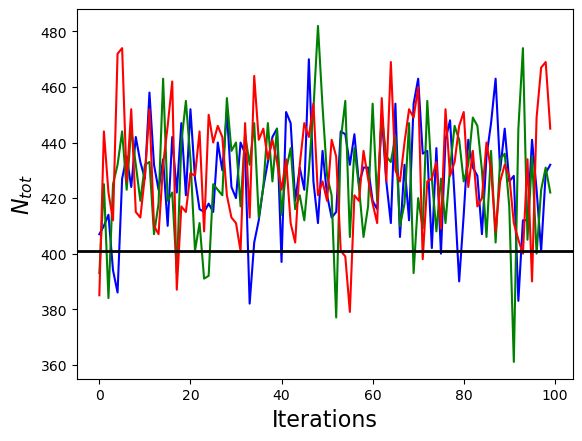

In [22]:
################################
# MCMC Convergence diagnostics #
################################

colors = list(mcolors.BASE_COLORS)[:ninits]
burnin=0
paramDim = sample.shape[1]
# plotDim = 1

# MCMC convergence plot for Ntot
fig = plt.figure(  )
for i, X, c in zip( range(ninits), samples, colors ):
    # break
    for j in [paramDim-1]:
        # break
        plt.plot(X[burnin:,j], c=c)
        if i == 0:
            plt.ylabel(r"$N_{tot}$", fontsize=16)
            plt.xlabel("Iterations", fontsize=16)

plt.axhline(Ntot, lw=2, c="k")

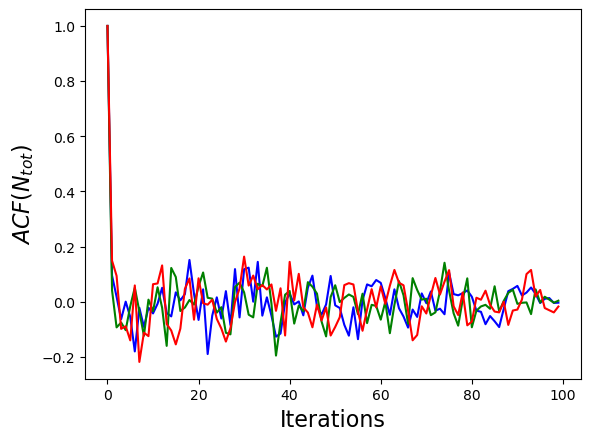

In [23]:
# ACF (MCMC autocorrelation) plot 
fig = plt.figure()
for i, X, c in zip( range(ninits), samples, colors ):
    for j in (paramDim-1,):
        # plt.subplot(paramDim,1,j+1)
        plt.plot(stattools.acf(X[burnin:,j], nlags=600), c=c)    
        if i == 0:
            plt.ylabel(r"$ACF(N_{tot})$", fontsize=16)
            plt.xlabel("Iterations", fontsize=16)



componentwise Gelman-Rubin convergence diagnostic: [0.99000381 0.99000199 0.99000017 0.99000142 0.9900092  0.9900096
 0.99000071 0.99000486 0.99000172 0.99000509 0.99000163 0.99000382
 0.99000295 0.99000808 0.99001049 0.99000249 0.99000025 0.99002084
 0.99001944 0.99002655 0.99001675 0.99000296 0.9900174  0.99002077
 0.99000044 0.99001027 0.99000338 0.99001138 0.99001105 0.99001164
 0.99000139 0.9900042  0.990011   0.99004929 0.99006362 0.99003948
 0.99001014 0.99000156 0.99000117 0.99000257 0.99001449 0.99000195
 0.99001837 0.99001526 0.99001043 0.99000103 0.99002806 0.99002705
 0.99006464 0.99004659 0.99003809 0.99003862 0.99003303 0.99008946
 0.9901935  0.99010506 0.99015643 0.99012876 0.99007273 0.99014632
 0.99003929 0.99008766 0.99007081 0.9900692  0.99004897 0.99009126
 0.9900902  0.99011653 0.9901541  0.99009426 0.99014204 0.99024053
 0.99009405 0.99009494 0.99016754 0.99007844 0.99015873 0.99011608
 0.99009261 0.99001617 0.99006595 0.99004958 0.99001831 0.99002797
 0.99003642 

<>:33: SyntaxWarning: invalid escape sequence '\w'
<>:33: SyntaxWarning: invalid escape sequence '\w'
/var/folders/sg/dctsqk2x00q_jnr3_qgfvhqr0000gn/T/ipykernel_35325/2241239271.py:33: SyntaxWarning: invalid escape sequence '\w'
  plt.ylabel("Gelman-Rubin $\widehat R$")


Text(0, 0.5, 'Gelman-Rubin $\\widehat R$')

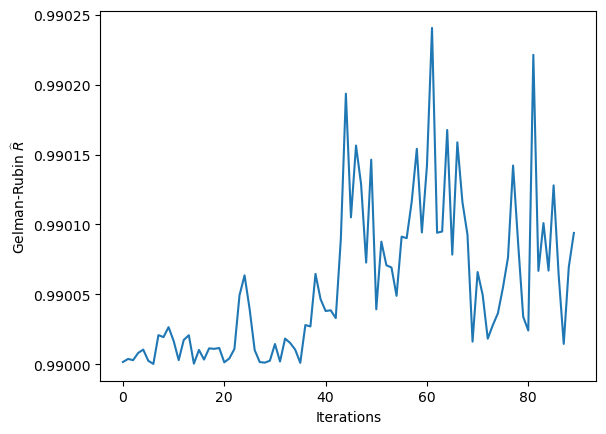

In [24]:

################
# Gelman-Rubin #
################

def iterative_mean(X):
    length = X.shape[1]
    # on prend les moyennes cumulées suivant le deuxième axe (une par composante de la chaîne)
    return X.cumsum(axis=1) / np.linspace(1, length, length).reshape(1,-1)

def iterative_var(X):
    length = X.shape[1]
    # on prend les variances cumulées suivant le deuxième axe (une par composante de la chaîne)
    return np.square(X).cumsum(axis=1) / np.linspace(1, length, length).reshape(1,-1) - iterative_mean(X)**2

# remarque : on enlève la première valeur des moyennes / variances cumulés
# pour éviter des valeurs de variance égales à zéro...
sample_means = np.array([iterative_mean(chain)[:,-1] for chain in samples])
sample_vars = np.array([iterative_var(chain)[:,-1] for chain in samples])

B = sampleSize / (ninits - 1) * sample_means.var(axis=0)
W = sample_vars.mean(axis=0)
V = (sampleSize - 1) / sampleSize * W + (ninits + 1) / (sampleSize * ninits) * B

R = V/W

print("componentwise Gelman-Rubin convergence diagnostic: %s"%(V/W))

fig = plt.figure()
# on enlève les premières iterations qui correspondent au temps de chauffe
plt.plot(R[10:])

plt.xlabel("Iterations")
plt.ylabel("Gelman-Rubin $\widehat R$")



427.84
428.0
385.905
467.19000000000005


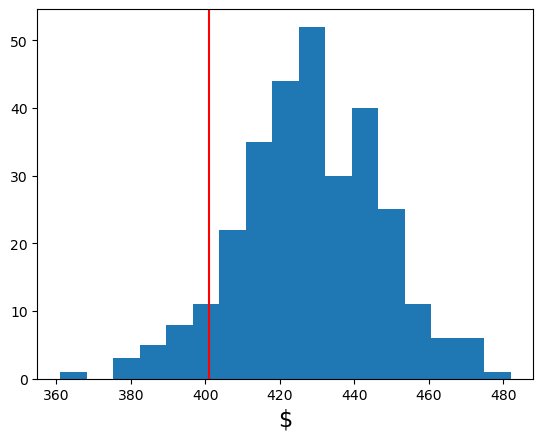

In [25]:
# Pool chains
sample = np.vstack([sample[burnin:] for sample in samples])

# Posterior marginals (pooling from all chains)
fig = plt.figure()
names = (r"$N_{tot}$")
Xtrue = [Ntot]
for j in (paramDim-1,):
    X = sample[burnin:,j]
    plt.hist(X, int(np.sqrt(len(X))))
    plt.xlabel(names[0], fontsize=16)
    plt.axvline(Xtrue[0], c='r')
    # plt.xlim(st.mstats.mquantiles(X,.01)[0], st.mstats.mquantiles(X,.99)[0])
    # plt.xlim(0, 14)
    print(X.mean())
    for p in [0.50, .025, .975]:
        print(st.mstats.mquantiles(X, p)[0])

WRN - Warning! For coherency we set scale upper bounds = [1.9906,1.98642]
WRN - Warning! For coherency we set scale upper bounds = [1.98885,1.97569]
WRN - Warning! For coherency we set scale upper bounds = [1.99219,1.99217]
WRN - Warning! For coherency we set scale upper bounds = [1.98045,1.98039]
WRN - Warning! For coherency we set scale upper bounds = [1.99506,1.97778]
WRN - Warning! For coherency we set scale upper bounds = [1.98269,1.99724]
WRN - Warning! For coherency we set scale upper bounds = [1.99317,1.99442]
WRN - Warning! For coherency we set scale upper bounds = [1.99714,1.99417]
WRN - Warning! For coherency we set scale upper bounds = [1.98588,1.9948]
WRN - Warning! For coherency we set scale upper bounds = [1.99113,1.98974]
WRN - Warning! For coherency we set scale upper bounds = [1.99755,1.99266]
WRN - Warning! For coherency we set scale upper bounds = [1.99325,1.99292]
WRN - Warning! For coherency we set scale upper bounds = [1.99336,1.99639]
WRN - Warning! For coherenc

Text(0.5, 1.0, 'Poisson intensity posterior mean vs Data')

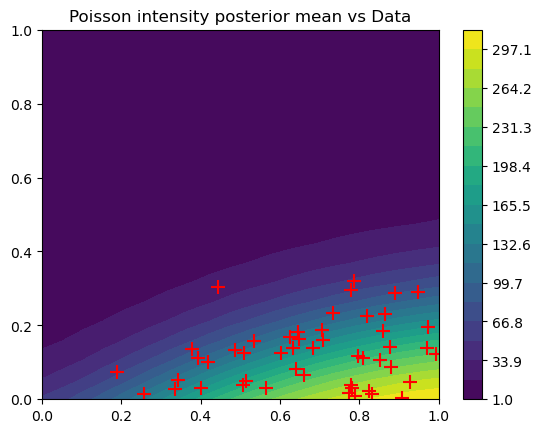

In [26]:
#######################################
# Predict GP throughout search domain #
#######################################

# meshgrid over search domain
gridsize = 20
xx, yy = np.meshgrid( np.linspace(0, 1, gridsize), np.linspace(0, 1, gridsize) )
XY_new = np.vstack(( xx.ravel(), yy.ravel() )).T

Z_new = np.zeros((len(sample), len(XY_new)))

for i in range(len(sample)):
    # break
    # GP conditional on values at augmented Poisson process
    PyRV_Pi.setParameter(py_link_function_Pi(sample[i], Nmax, N))
    Z_new[i] = PyRV_Pi.SimulateSigmaGP( XY_new )
    
Z_mean = Z_new.mean(axis=0).reshape(gridsize, gridsize) * lambdaBar * T
levels_mean = np.linspace( Z_mean.min(), Z_mean.max(), gridsize )

Z_std = Z_new.std(axis=0).reshape(gridsize, gridsize) * lambdaBar * T
levels_std = np.linspace( Z_std.min(), Z_std.max(), gridsize)

fig = plt.figure()
plt.contourf(xx, yy, Z_mean, levels_mean)
plt.colorbar()
plt.scatter( D[:,0], D[:,1], s=100, c='r', marker='+' )
plt.title("Poisson intensity posterior mean vs Data")

Text(0.5, 1.0, 'Poisson intensiety Posterior std vs Data')

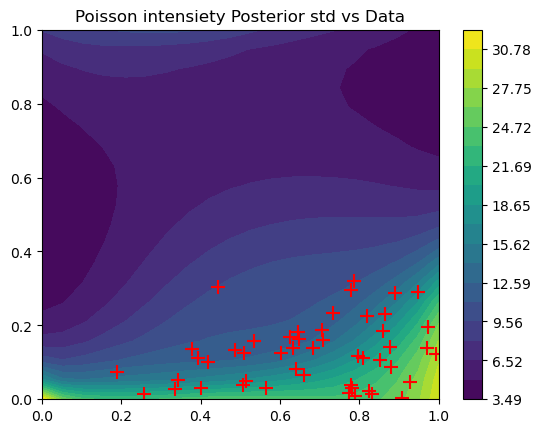

In [27]:
fig = plt.figure()
plt.contourf(xx, yy, Z_std, levels_std)
plt.colorbar()
plt.scatter( D[:,0], D[:,1], s=100, c='r', marker='+' )
plt.title("Poisson intensiety Posterior std vs Data")

In [28]:
f_end = time.time()

print("Total Running Time : %s seconds"%int(f_end - f_init))

Total Running Time : 61 seconds
